In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/corrupcao.csv')
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Orcamento_Total          100 non-null    float64
 1   Salario_Medio_Func       100 non-null    float64
 2   Numero_Fiscalizacoes     100 non-null    int64  
 3   Contratos_Publicos       100 non-null    int64  
 4   Indice_Transparencia     100 non-null    float64
 5   Partido_Governo          79 non-null     object 
 6   Midia_Livre              80 non-null     object 
 7   Judiciario_Atuante       94 non-null     object 
 8   Cultura_Corrupcao        73 non-null     object 
 9   Investigacoes_Federais   68 non-null     object 
 10  Corrupcao_Valor_Perdido  95 non-null     float64
dtypes: float64(4), int64(2), object(5)
memory usage: 8.7+ KB
None


,Orcamento_Total,Salario_Medio_Func,Numero_Fiscalizacoes,Contratos_Publicos,Indice_Transparencia,Partido_Governo,Midia_Livre,Judiciario_Atuante,Cultura_Corrupcao,Investigacoes_Federais,Corrupcao_Valor_Perdido
0,38918886.0,3228.0,244,743,73.8,Progressista,Baixa,Sim,Baixa,Não,1873016.0
1,42742814.0,4411.0,214,1301,74.2,NaN,Média,Sim,Baixa,Não,1685273.0
2,55228043.0,5272.0,179,1162,27.1,Conservador,Média,Sim,Média,Não,458095.0
3,62344419.0,4421.0,219,1135,47.9,NaN,Média,Não,Média,Sim,4913061.0
4,50968959.0,3645.0,120,1338,45.1,Conservador,Baixa,Sim,Alta,Não,2486475.0


In [ ]:
df1 = df.copy()
df1['Partido_Governo'] = df1['Partido_Governo'].fillna('não informado')
df1['Midia_Livre'] = df1['Midia_Livre'].fillna('não informado')
df1['Judiciario_Atuante'] = df1['Judiciario_Atuante'].fillna('não informado')
df1['Cultura_Corrupcao'] = df1['Cultura_Corrupcao'].fillna('não informado')
df1['Investigacoes_Federais'] = df1['Investigacoes_Federais'].fillna('não informado')

df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Orcamento_Total          95 non-null     float64
 1   Salario_Medio_Func       95 non-null     float64
 2   Numero_Fiscalizacoes     95 non-null     int64  
 3   Contratos_Publicos       95 non-null     int64  
 4   Indice_Transparencia     95 non-null     float64
 5   Partido_Governo          95 non-null     object 
 6   Midia_Livre              95 non-null     object 
 7   Judiciario_Atuante       95 non-null     object 
 8   Cultura_Corrupcao        95 non-null     object 
 9   Investigacoes_Federais   95 non-null     object 
 10  Corrupcao_Valor_Perdido  95 non-null     float64
dtypes: float64(4), int64(2), object(5)
memory usage: 8.9+ KB


In [ ]:
df2 = pd.get_dummies(df1, columns=['Partido_Governo','Midia_Livre','Judiciario_Atuante','Cultura_Corrupcao','Investigacoes_Federais'], drop_first=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Orcamento_Total                       95 non-null     float64
 1   Salario_Medio_Func                    95 non-null     float64
 2   Numero_Fiscalizacoes                  95 non-null     int64  
 3   Contratos_Publicos                    95 non-null     int64  
 4   Indice_Transparencia                  95 non-null     float64
 5   Corrupcao_Valor_Perdido               95 non-null     float64
 6   Partido_Governo_Conservador           95 non-null     bool   
 7   Partido_Governo_Populista             95 non-null     bool   
 8   Partido_Governo_Progressista          95 non-null     bool   
 9   Partido_Governo_não informado         95 non-null     bool   
 10  Midia_Livre_Baixa                     95 non-null     bool   
 11  Midia_Livre_Média         

In [ ]:
Y = 'Corrupcao_Valor_Perdido'
X = df2.columns.drop(Y)

X_train, X_test, Y_train, Y_test = train_test_split(df2[X], df2[Y], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.5766274235778516
0.4007680602811584


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2)
X_train_poly = poly_f.fit_transform(X_train)
X_test_poly = poly_f.fit_transform(X_test)

model.fit(X_train_poly, Y_train) # observar o X tratado: será o desenho de uma curva
print(model.score(X_train_poly, Y_train))
print(model.score(X_test_poly, Y_test))

0.7061458223184455
0.12043745076668078


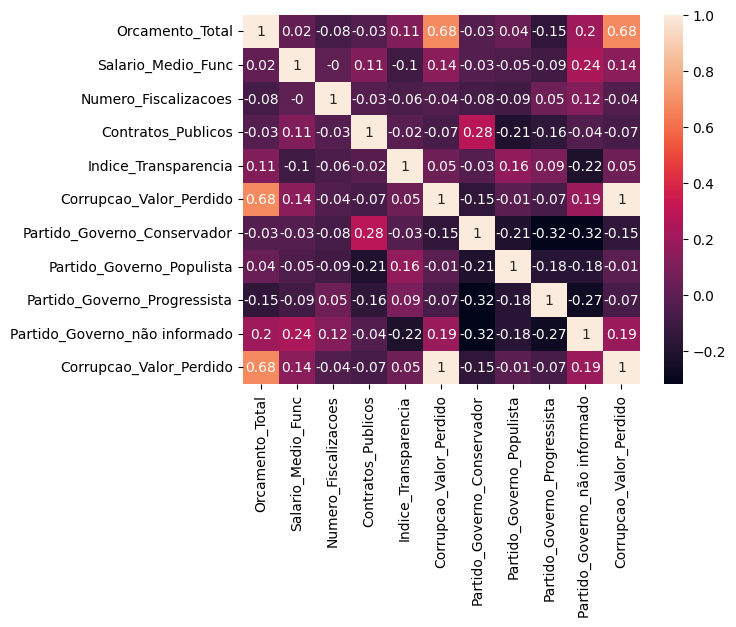

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col1 = ['Orcamento_Total',
'Salario_Medio_Func',
'Numero_Fiscalizacoes',
'Contratos_Publicos',
'Indice_Transparencia',
'Corrupcao_Valor_Perdido',
'Partido_Governo_Conservador',
'Partido_Governo_Populista',
'Partido_Governo_Progressista',
'Partido_Governo_não informado']

col2 = df2.columns.drop(col1)

matrix = df2[col1 + [Y]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


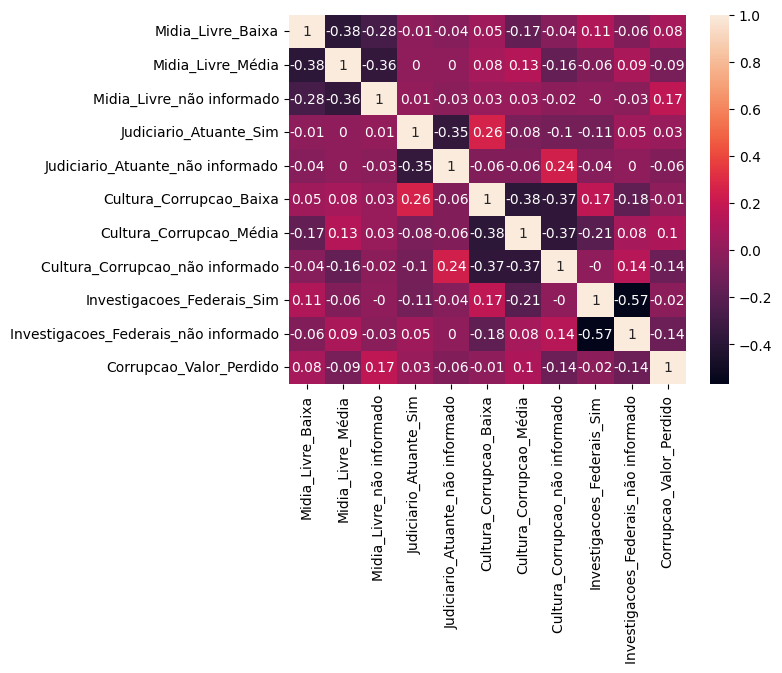

In [ ]:
matrix = df2[col2.to_list() + [Y]].corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
